# K-means Clustering

Search for cluster centers that

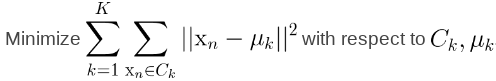

We use an approximate iterative solution method that locates centers using the following update rules


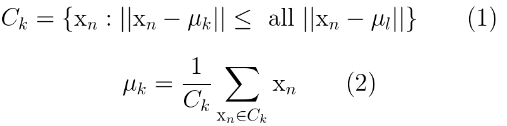

Iteration continues until cluster assignments do not change or we reach a predefined number of iterations. This method finds a locak minimum rather than the global minimum, so it is an approximate method.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)

N = 10
X = np.array([(random.uniform(0, 1), random.uniform(0,1)) for i in range(N)])
print('Dataset: %s' %X)

def assign_points_to_clusters(X, mu):
    # expected cluster data structure
    # { 
    #   0: [array([0.84442185, 0.7579544 ]), array([0.90811289, 0.50468686]), ... ], 
    #   1: [array([0.78379859, 0.30331273]), array([0.618369  , 0.25050634]), ... ], 
    #   2: [array([0.42057158, 0.25891675]), array([0.51127472, 0.40493414]), ... ] 
    # }
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    # expected mu data structure
    # [ array([0.90811289, 0.50468686]), 
    #   array([0.618369  , 0.25050634]), 
    #   array([0.42057158, 0.25891675]) ]
    # Exercise 2
    pass

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def kmeans(X, K):
    # Initialize to K random centers
    oldmu = random.sample(list(X), K)
    mu = random.sample(list(X), K)
    while not has_converged(mu, oldmu):
        print('new mu: %s' %mu)
        # Assign all points in X to clusters
        clusters = assign_points_to_clusters(X, mu)
        # Reevaluate centers
        oldmu = mu
        mu = reevaluate_centers(mu, clusters)
    return(mu, clusters)

(mu, clusters) = kmeans(X, 3)

print(clusters)

for k in clusters.keys():
    x_values = []
    y_values = []
    for data_point in clusters[k]:
        x_values.append(data_point[0])
        y_values.append(data_point[1])

    plt.scatter(x_values, y_values)

cluster_centers_x = []
cluster_centers_y = []
for c in mu:
    cluster_centers_x.append(c[0])
    cluster_centers_y.append(c[1])
plt.scatter(cluster_centers_x, cluster_centers_y, marker='*', s=200)
print('done')

Dataset: [[0.84442185 0.7579544 ]
 [0.42057158 0.25891675]
 [0.51127472 0.40493414]
 [0.78379859 0.30331273]
 [0.47659695 0.58338204]
 [0.90811289 0.50468686]
 [0.28183784 0.7558042 ]
 [0.618369   0.25050634]
 [0.90974626 0.98278548]
 [0.81021724 0.90216595]]
new mu: [array([0.90811289, 0.50468686]), array([0.618369  , 0.25050634]), array([0.42057158, 0.25891675])]


NameError: name 'clusters' is not defined